### confusion matrix 
$= \begin{bmatrix}TP & FN \\ FP & TN \end{bmatrix}$

```python
sk.metrics.confusion_matrix(y_test, y_predict)


```

- precision 
    - $TP \over {TP + FP}$
    - True라고 예측한 것 중 실제 True의 비율
    - 모델 입장에서 정답이라고 맞춘 경우
    
- recall
    - $TP \over {TP + FN}$
    - 실제 True인 것 중에 True라고 예측한 것의 비율
    - 데이터 입장에서 정답이라고 맞춘경우
    
- 아직도 잘 모르겠다..

In [1]:
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(url, index_col=0)
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=13)

# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(f'Train Acc : {accuracy_score(y_train, y_pred_train)}')
print(f'Test Acc : {accuracy_score(y_test, y_pred_test)}')

Train Acc : 0.7427361939580527
Test Acc : 0.7438461538461538


In [2]:
# classificaion report
from sklearn.metrics import classification_report
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



In [3]:
# confusion matrix
sk.metrics.confusion_matrix(y_test, lr.predict(X_test))

array([[275, 202],
       [131, 692]], dtype=int64)

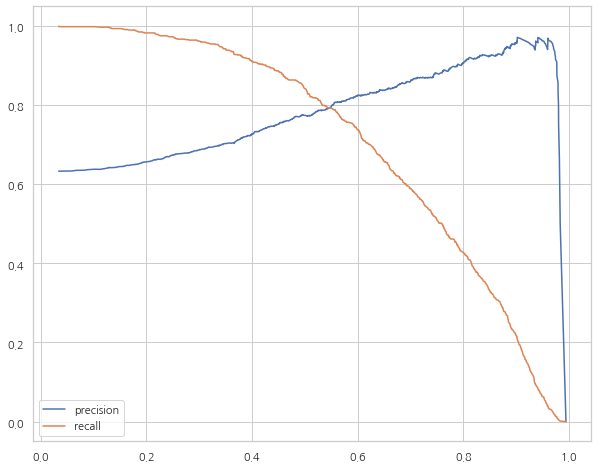

In [4]:
# precision_recall curve
%matplotlib inline
plt.figure(figsize=(10, 8))
pred = lr.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = sk.metrics.precision_recall_curve(y_test, pred)
plt.plot(thresholds, precisions[:len(thresholds)], label='precision')
plt.plot(thresholds, recalls[:len(thresholds)], label='recall')
plt.grid(True); plt.legend(); plt.show();

## Boosting Algorithm
### 앙상블 기법
- voting, bagging, boosting, stacking 등
- voting, bagging : 여러개의 분류가기 투표를 통해 최종 예측 결과를 결정하는 방식
- voting : 각각 다른 분류기 사용
---
- bagging : 같은 분류기 사용 (ex) RandomForest
    - Bootstrap AGGregatING
    - 한번에 병렬적으로 결과를 얻음(parallel)
- boosting
    - 여러개의 약한 분류기가 순차적으로 학습을 하면서, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해 다음 분류기가 가중치를 인가해서 학습을 이어 진행하는 방식
    - 예측 성능이 뛰어나 앙상블 학습을 주도
        - 순차적으로 진행(sequential)

    - gradient boost, XGBoost(eXtra), LightGBM 등
    
#### AdaBoost
- 순차적으로 가중치를 부여해서 최종 결과를 얻음. 
- DecisionTree 기반 알고리즘
- Steps
    - 예측하여 +와 -의 경계를 설정
    - 틀린 + 에 가중치를 인가하고 경계를 다시 결정
    - 다시 놓친 - 에 가중치를 인가하고 경계를 다시 결정
    - 앞서 결정한 경계들을 합침
---
#### 부스팅 기법

- GBM(grdient boost machine):
    - 가중치를 업데이트할 때 경사하강법을 사용, AdaBoost와 비슷
    - 부스팅 알고리즘은 여러 개의 약한 학습기를 순차적으로 **학습-예측**하면서 잘못 예측한 데이터에 가중치를 부여해서 오류를 개선해가는 방식
- XGBoost 
    - GBM에서 PC의 파워를 효율적으로 사용하기 위한 다양한 기법에 채택되어 빠른 속도와 효율을 가짐
    - 트리기반의 앙상블 학습 중에 가장 각광받는 알고리즘
    - GBM의 느린 속도를 다양한 규제를 통해 해결
    - 병렬 학습이 가능하도록 설계
    - 반복 수행시마다 내부적으로 학습데이터와 검증데이터를 교차검증
    - 교차검증을 통해 최적화되면 반복을 중단하는 조기중단 기능이 있음
    
- LightGBM 
    - XGBoost보다 빠른 속도를 가짐
    - XGBoost와 함께 부스팅 계열에서 가장 각광받는 알고리즘
    - 적은 수의 데이터는 X (일반적으로 10000건 이상의 데이터가 필요하다고 함)
    - GPU 버전 존재